<a href="https://colab.research.google.com/github/junisatria20/DeepLearning/blob/main/KSD_Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/climate_change_impact_on_agriculture_2024.csv')

In [ ]:
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

10000 instance

15 features

No missing values

only 4 categorical features

In [ ]:
df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [ ]:
# Pemeriksaan Kualitas Data
print("\nJumlah Nilai Kosong di Setiap Kolom:")
print(df.isnull().sum())


Jumlah Nilai Kosong di Setiap Kolom:
Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


In [ ]:
df['Crop_Type'].value_counts()

,count
Crop_Type,
Wheat,1047
Cotton,1044
Vegetables,1036
Corn,1022
Rice,1022
Sugarcane,995
Fruits,979
Soybeans,958
Barley,952


In [ ]:
df['Country'].value_counts()

,count
Country,
Australia,1032
USA,1032
China,1031
Nigeria,1029
India,1025
Canada,984
Argentina,984
France,978
Russia,961


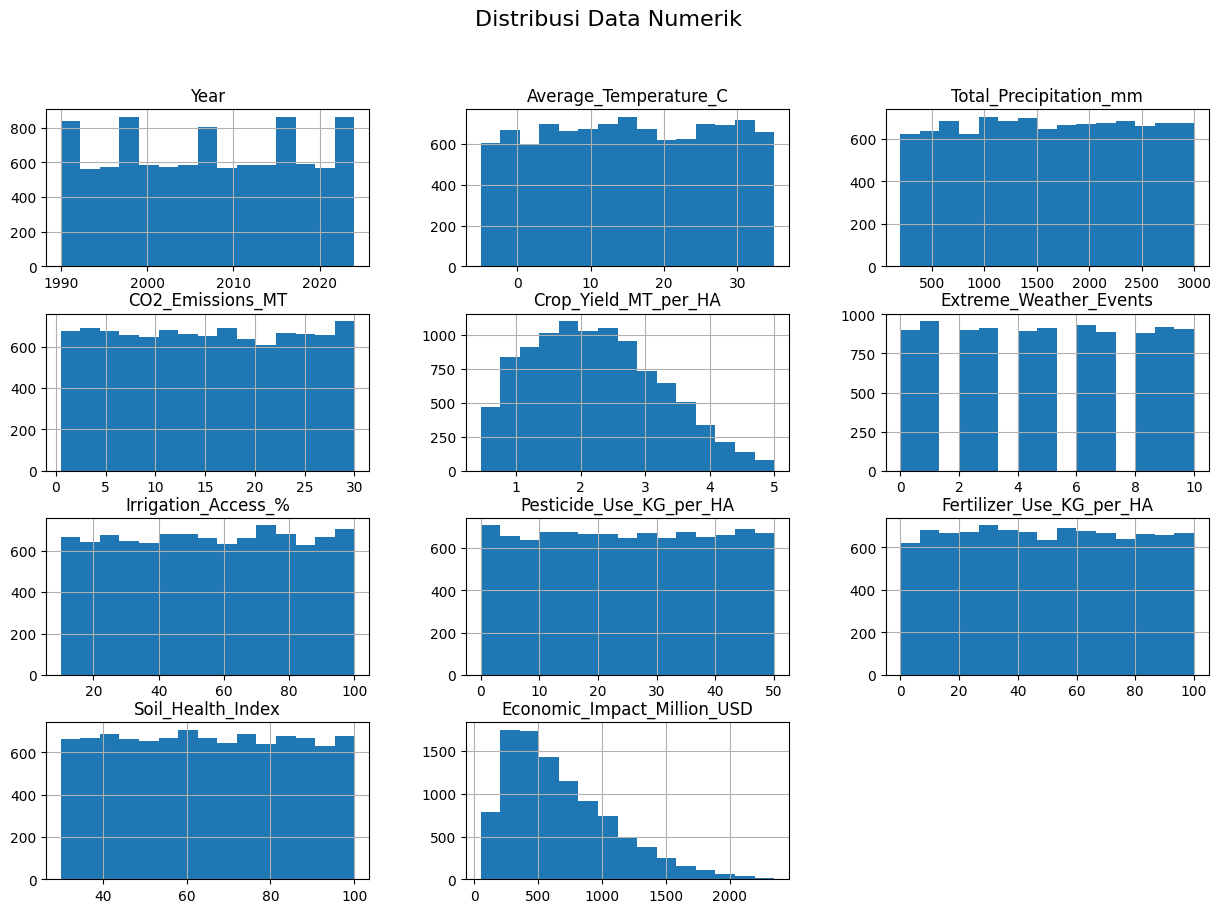

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram untuk kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()

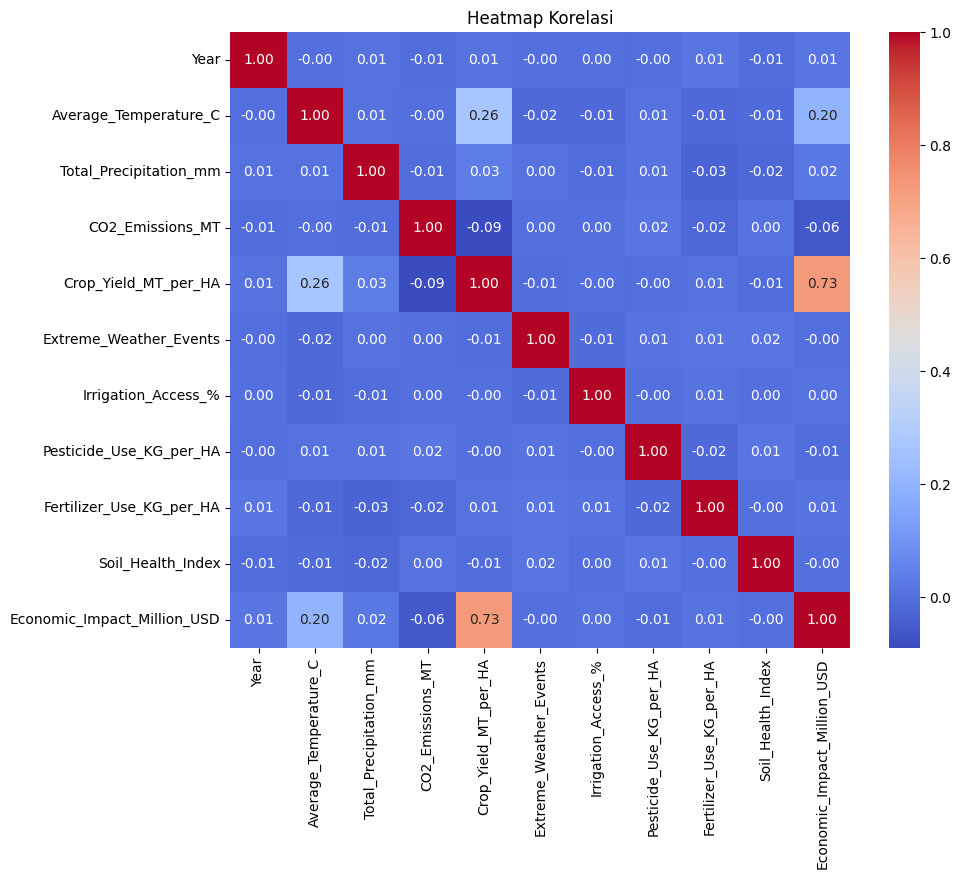

In [ ]:
# Heatmap untuk korelasi data numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Encoding Fitur Kategorikal
categorical_features = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']
numerical_features = [
    'Year', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
    'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
    'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD'
]

# Target (Crop Yield)
target = 'Crop_Yield_MT_per_HA'

# Memisahkan target dan fitur
X = df.drop(columns=[target])
y = df[target]

# Pipeline untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Normalisasi fitur numerik
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encoding untuk kategorikal
    ]
)

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Pipeline untuk Data Training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Transformasi data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print("Shape data setelah preprocessing:")
print("X_train:", X_train_processed.shape)
print("X_test:", X_test_processed.shape)

Shape data setelah preprocessing:
X_train: (8000, 65)
X_test: (2000, 65)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Model Awal: Linear Regression
model_lr = LinearRegression()

# Melatih model
model_lr.fit(X_train_processed, y_train)

# Prediksi pada data uji
y_pred_lr = model_lr.predict(X_test_processed)

# Evaluasi Model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# 2. Model Lanjutan: Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Melatih model
model_rf.fit(X_train_processed, y_train)

# Prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_processed)

# Evaluasi Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


Linear Regression Performance:
MAE: 0.55
MSE: 0.46
R²: 0.56

Random Forest Regressor Performance:
MAE: 0.51
MSE: 0.40
R²: 0.62


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search untuk Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # Cross-validation dengan 5 fold
    scoring='r2',
    n_jobs=-1,  # Gunakan semua prosesor yang tersedia
    verbose=2
)

# Melakukan pencarian parameter terbaik
grid_search.fit(X_train_processed, y_train)

# Model terbaik
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R²:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R²: 0.6095086905882496


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluasi dengan cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_processed, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {np.mean(cv_scores):.2f}, Std Dev: {np.std(cv_scores):.2f}")


Cross-Validation R² Scores: [0.6076116  0.63031734 0.59921259 0.60645767 0.60394426]
Mean R²: 0.61, Std Dev: 0.01


In [ ]:
# Prediksi pada data uji
y_pred_test = best_rf_model.predict(X_test_processed)

# Evaluasi model
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nFinal Model Performance on Test Data:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"R²: {r2_test:.2f}")



Final Model Performance on Test Data:
MAE: 0.50
MSE: 0.39
R²: 0.63


In [ ]:
print(f"Panjang Feature Importance: {len(feature_importance)}")
print(f"Panjang Feature Names: {len(feature_names)}")

Panjang Feature Importance: 65
Panjang Feature Names: 14


In [ ]:
# Mendapatkan nama fitur setelah preprocessing
# OneHotEncoder secara otomatis menambahkan nama kategori, StandardScaler hanya meneruskan nama aslinya.
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Cek jumlah nama fitur
print(f"Panjang Feature Names: {len(feature_names)}")
print(f"Contoh Feature Names: {feature_names[:10]}")

Panjang Feature Names: 65
Contoh Feature Names: ['num__Year' 'num__Average_Temperature_C' 'num__Total_Precipitation_mm'
 'num__CO2_Emissions_MT' 'num__Extreme_Weather_Events'
 'num__Irrigation_Access_%' 'num__Pesticide_Use_KG_per_HA'
 'num__Fertilizer_Use_KG_per_HA' 'num__Soil_Health_Index'
 'num__Economic_Impact_Million_USD']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Melatih model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_processed, y_train)

# Mendapatkan feature importance
feature_importance = model_rf.feature_importances_

# Membuat DataFrame untuk Feature Importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df.head())

                            Feature  Importance
9  num__Economic_Impact_Million_USD    0.574836
1        num__Average_Temperature_C    0.113783
3             num__CO2_Emissions_MT    0.036505
2       num__Total_Precipitation_mm    0.032765
6      num__Pesticide_Use_KG_per_HA    0.031661


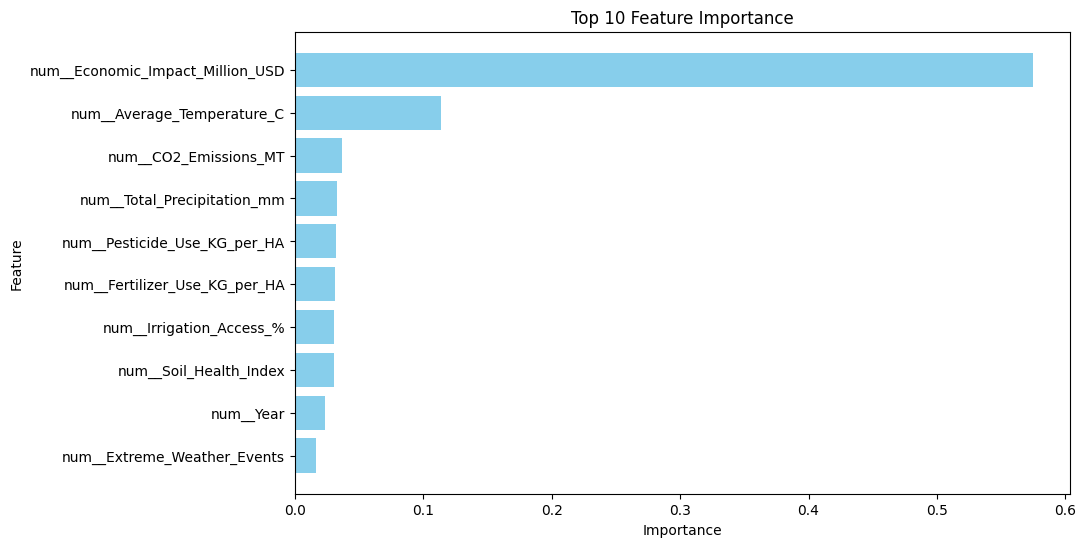

In [ ]:
import matplotlib.pyplot as plt

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance")
plt.gca().invert_yaxis()  # Membalikkan urutan untuk fitur dengan importance tertinggi di atas
plt.show()

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.1 MB/s eta 0:00:00


In [ ]:
import os

# Membuat struktur folder
os.makedirs("project/model", exist_ok=True)

# Membuat file kosong (untuk keperluan struktur)
open("project/app.py", "w").close()
open("project/model/pipeline.pkl", "w").close()
open("project/model/model.pkl", "w").close()

print("Struktur folder berhasil dibuat!")

Struktur folder berhasil dibuat!


In [ ]:
import joblib

# Simpan pipeline preprocessing
joblib.dump(pipeline, 'project/model/pipeline.pkl')

# Simpan model terlatih
joblib.dump(model_rf, 'project/model/model.pkl')

['project/model/model.pkl']

In [ ]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
import numpy as np

# Inisialisasi FastAPI
app = FastAPI()

# Muat model dan pipeline
model = joblib.load('project/model/model.pkl')  # Ganti dengan path yang sesuai
pipeline = joblib.load('project/model/pipeline.pkl')  # Ganti dengan path yang sesuai

# Mendefinisikan model input untuk FastAPI
class CropPredictionRequest(BaseModel):
    Year: int
    Country: str
    Region: str
    Crop_Type: str
    Average_Temperature_C: float
    Total_Precipitation_mm: float
    CO2_Emissions_MT: float
    Extreme_Weather_Events: int
    Irrigation_Access_percent: float  # Ganti nama atribut di sini
    Pesticide_Use_KG_per_HA: float
    Fertilizer_Use_KG_per_HA: float
    Soil_Health_Index: float
    Adaptation_Strategies: str
    Economic_Impact_Million_USD: float

# Fungsi untuk memproses input dan menghasilkan prediksi
@app.post("/predict")
def predict_crop_yield(data: CropPredictionRequest):
    # Ubah input menjadi dataframe
    input_data = pd.DataFrame([data.dict()])

    # Preprocessing data
    processed_data = pipeline.transform(input_data)

    # Prediksi dengan model terlatih
    prediction = model.predict(processed_data)

    # Mengembalikan hasil prediksi
    return {"predicted_crop_yield": prediction[0]}

# Endpoint untuk mengecek status aplikasi
@app.get("/")
def read_root():
    return {"message": "Aplikasi prediksi hasil panen berjalan"}